# Does Minimum Wage Really Decrease Employment?

"Textbook economics basically dictates that a minimum wage higher than the one determined by market forces of supply and demand would make more people willing to work, but fewer firms able to afford to pay a higher wage. If so, the theoretical consequences would be job destruction, i.e. very high unemployment." ~ [Morning Future](https://www.morningfuture.com/en/2022/02/14/employment-minimum-wage-nobel/#:~:text=Textbook%20economics%20basically%20dictates%20that,destruction%2C%20i.e.%20very%20high%20unemployment.)

In [1]:
# Import standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

Here, Ireland is the key to respond to *"Do Minimum Wage Really Decrease Employment?"*

Several EU countries hadn't introduced a minimum wage before 2015. Some of them are: Germany, Austria, Denmark, Finland, Italy, Iceland, Norway, Switzerland.

To delve deeper into this, I created a synthetic control using data from these countries. Essentially, it's like crafting an imaginary nation, pieced together from bits and parts of the previous countries.

The aim? **To uncover what might have happened if Ireland hadn't implemented a minimum wage on 1st April 2000.**

### Data source:
[databank](https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.ZS&country=DEU#)

### Data Cleaning

In [2]:
# Read the data

path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\minimun_wage_countries.xlsx'

df = pd.read_excel(path).drop(columns=['Series Name','Series Code'])

df.head()

,Country Name,Country Code,1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Germany,DEU,..,..,..,..,56.259,55.009,53.832,53.083,...,52.917,54.028,54.785,54.793,55.232,56.593,56.838,57.194,57.402,57.390
1,Austria,AUT,..,..,..,..,53.930,54.558,54.281,56.969,...,55.833,56.892,57.557,57.109,57.348,57.559,57.672,57.535,57.164,57.113
2,Denmark,DNK,..,..,..,..,61.657,61.960,60.148,59.204,...,63.359,63.213,62.685,60.263,58.579,58.151,57.450,56.887,57.015,57.469
3,Finland,FIN,..,..,..,..,59.302,54.893,51.363,50.575,...,56.273,57.006,57.525,55.449,54.822,55.198,55.111,54.256,53.821,53.381
4,Sweden,SWE,..,..,..,..,64.201,61.245,57.596,56.709,...,58.889,59.801,59.899,58.073,57.833,58.727,58.741,59.123,59.323,59.779


In [3]:
# Rename the columns;
# eg: 1987 [YR1987] --> 1987

df.rename(columns={'Country Name':'name', 'Country Code':'code'}, inplace=True)
df.rename(columns={old_c: new_c for old_c, new_c in zip(df.columns.to_list()[2:], range(1987, 2016))},
          inplace=True)

df.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    10 non-null     object 
 1   code    10 non-null     object 
 2   1987    10 non-null     object 
 3   1988    10 non-null     object 
 4   1989    10 non-null     object 
 5   1990    10 non-null     object 
 6   1991    10 non-null     float64
 7   1992    10 non-null     float64
 8   1993    10 non-null     float64
 9   1994    10 non-null     float64
dtypes: float64(4), object(6)
memory usage: 932.0+ bytes


In [4]:
# Drop the columns with all missing data

df.drop(columns=[1987,1988,1989,1990], inplace=True)
df.head()

,name,code,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Germany,DEU,56.259,55.009,53.832,53.083,53.001,52.529,51.984,52.033,...,52.917,54.028,54.785,54.793,55.232,56.593,56.838,57.194,57.402,57.390
1,Austria,AUT,53.930,54.558,54.281,56.969,56.845,55.724,55.430,55.601,...,55.833,56.892,57.557,57.109,57.348,57.559,57.672,57.535,57.164,57.113
2,Denmark,DNK,61.657,61.960,60.148,59.204,60.094,60.740,61.906,61.895,...,63.359,63.213,62.685,60.263,58.579,58.151,57.450,56.887,57.015,57.469
3,Finland,FIN,59.302,54.893,51.363,50.575,49.563,50.009,51.107,52.217,...,56.273,57.006,57.525,55.449,54.822,55.198,55.111,54.256,53.821,53.381
4,Sweden,SWE,64.201,61.245,57.596,56.709,57.540,56.957,56.200,56.522,...,58.889,59.801,59.899,58.073,57.833,58.727,58.741,59.123,59.323,59.779


### Feature Engineering

Employment rate has an upper bound and varies across countries. That's why it might be better to focus on the yearly change in the employment rate rather than the absolute values.

In [5]:
# Make a copy to use later
df2 = df.copy()

In [6]:
# Calculate the yearly change

try:
    df.drop(columns=1991, inplace=True)
except:
    pass

cols = df2.columns.to_list()[2:]
for idx in range(1,len(cols)):
    df[cols[idx]] = df2[cols[idx]] - df2[cols[idx-1]]

df.head()

,name,code,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Germany,DEU,-1.250,-1.177,-0.749,-0.082,-0.472,-0.545,0.049,0.706,...,1.023,1.111,0.757,0.008,0.439,1.361,0.245,0.356,0.208,-0.012
1,Austria,AUT,0.628,-0.277,2.688,-0.124,-1.121,-0.294,0.171,0.616,...,0.694,1.059,0.665,-0.448,0.239,0.211,0.113,-0.137,-0.371,-0.051
2,Denmark,DNK,0.303,-1.812,-0.944,0.890,0.646,1.166,-0.011,0.523,...,0.880,-0.146,-0.528,-2.422,-1.684,-0.428,-0.701,-0.563,0.128,0.454
3,Finland,FIN,-4.409,-3.530,-0.788,-1.012,0.446,1.098,1.110,1.520,...,0.638,0.733,0.519,-2.076,-0.627,0.376,-0.087,-0.855,-0.435,-0.440
4,Sweden,SWE,-2.956,-3.649,-0.887,0.831,-0.583,-0.757,0.322,1.310,...,0.717,0.912,0.098,-1.826,-0.240,0.894,0.014,0.382,0.200,0.456


In [7]:
# Transpose the data as required by Synthetic Control

df = (df.drop(columns='code')
    .T)
df = df.rename(columns=df.iloc[0]).drop('name')

df.head()

,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland,Ireland
1992,-1.25,0.628,0.303,-4.409,-2.956,-1.436,-0.763,-0.311,-0.455,-0.715
1993,-1.177,-0.277,-1.812,-3.53,-3.649,-0.873,-1.415,-0.196,-0.475,0.22
1994,-0.749,2.688,-0.944,-0.788,-0.887,-0.869,0.004,0.776,-0.925,1.131
1995,-0.082,-0.124,0.89,-1.012,0.831,-0.634,2.359,0.132,0.362,1.583
1996,-0.472,-1.121,0.646,0.446,-0.583,0.038,0.051,2.116,2.829,0.865


## Data exploration

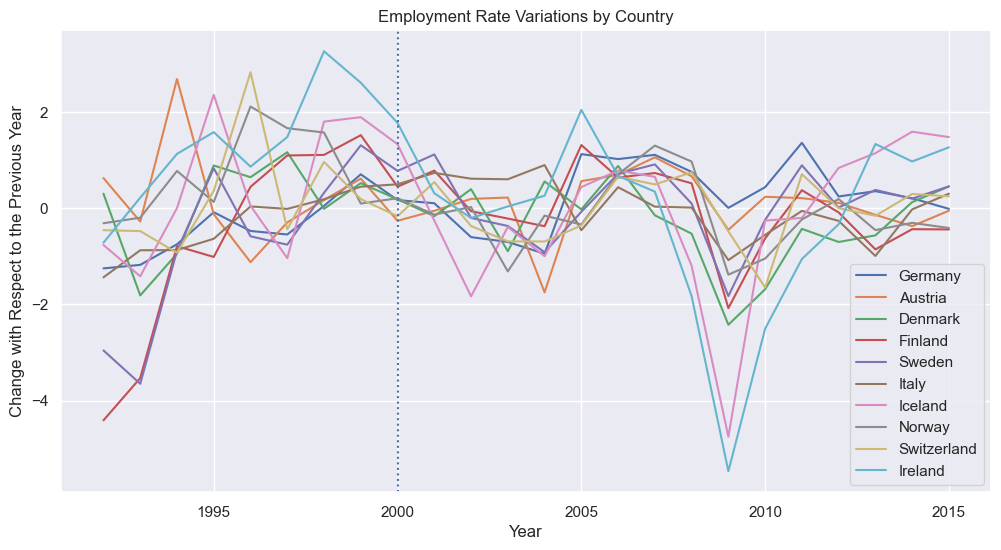

In [8]:
fig, ax = plt.subplots(figsize=(12,6))

for country in df.columns.tolist():
    sns.lineplot(data=df, x=df.index, y=country, label=country, ax=ax)

plt.axvline(x=2000, linestyle=':')

ax.set_title('Employment Rate Variations by Country')
ax.set_xlabel('Year')
ax.set_ylabel('Change with Respect to the Previous Year')

plt.show()

### Basic Synthetic Control

In [9]:
# Create the 4 dataframe for Synt. Control.
# pre-treatment, post-treatment, control, treated

y_co = df.drop(columns='Ireland')
y_tr = df['Ireland']

y_pre_co = y_co[y_co.index < 2000]
y_pre_tr = y_tr[y_tr.index < 2000]

y_post_co = y_co[y_co.index >= 2000]
y_post_tr = y_tr[y_tr.index >= 2000]

In [10]:
# Implement the simplies synthetic control for benchmark

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(y_pre_co, y_pre_tr)

weights_lr = model.coef_
weights_lr.round(3)

array([-0.934, -0.188,  0.224,  2.436, -2.45 , -1.967,  1.993, -1.111,
       -0.043])

In [11]:
def viz_predictions(df_plot, xlabel):
    fig, ax = plt.subplots()

    for c in ['True Values','Predictions']:
        sns.lineplot(data=df_plot, x=xlabel, y=c, label=c, ax=ax)

    plt.axvline(x=2000, linestyle=':')

    ax.set_title('Predictions of Ireland Employment Rate Change')
    ax.set_xlabel('Year')
    ax.set_ylabel('Change with Respect to the Previous Year')

    ax.annotate('Intro. minimum\nwage Ireland',
                xy=(2000, -4.2), xytext=(1994, -3), xycoords='data',
                arrowprops=dict(arrowstyle="->", linewidth=2,
                color='black'))

    plt.show()

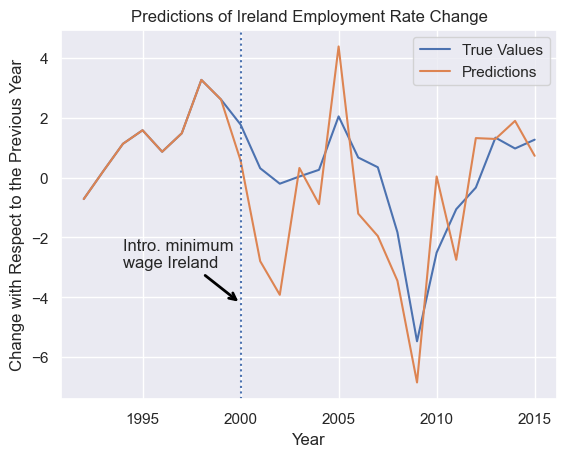

In [12]:
# Visualize the performance

y0_hat = y_co.dot(weights_lr) # predictions
df_plot = pd.DataFrame({'year':y_co.index, 'True Values':y_tr, 
                        'Predictions':y0_hat})

viz_predictions(df_plot, 'year')


### Synthetic Control with Constraints

In [13]:
# Add constraints to avoid over-fitting;
#   1) All the weights are greater or equal to 0.
#   2) The sum of all the weights is 1.


from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import (check_X_y, check_array,
                                               check_is_fitted)
import cvxpy as cp

# Define a reusable class
class SyntheticControl(BaseEstimator, RegressorMixin):

    def __init__(self,):
        pass

    def fit(self, y_pre_co, y_pre_tr):

        y_pre_co, y_pre_tr = check_X_y(y_pre_co, y_pre_tr)
             
        w = cp.Variable(y_pre_co.shape[1])
                 
        objective = cp.Minimize(cp.sum_squares(y_pre_co@w - y_pre_tr))
        constraints = [cp.sum(w) == 1, w >= 0]
                 
        problem = cp.Problem(objective, constraints)
                 
        self.loss_ = problem.solve(verbose=False)
        self.w_ = w.value
                 
        self.is_fitted_ = True
        return self
                 
                 
    def predict(self, y_co):

        check_is_fitted(self)
        y_co = check_array(y_co)
                 
        return y_co @ self.w_

(CVXPY) Mar 27 09:53:05 AM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: Impossibile trovare il modulo specificato.')


In [14]:
# Fit the model
model = SyntheticControl()
model.fit(y_pre_co, y_pre_tr)

model.w_.round(3)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.48, 0.52, 0.  ])

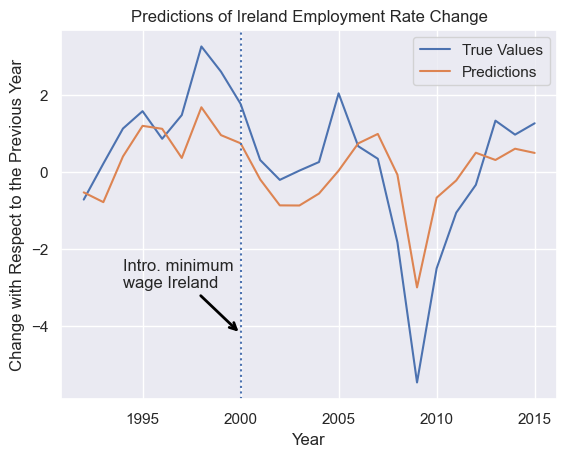

In [15]:
# Visualize the predictions

y0_hat = y_co.dot(model.w_) # predictions
df_plot = pd.DataFrame({'year':y_co.index, 'True Values':y_tr,
                        'Predictions':y0_hat})

viz_predictions(df_plot, 'year')

## Synthetic Control + Covariates

The strength of the economy has a big impact on employment rates. So, to make our analysis even better, I'm incorporating changes in the UK's GDP into our synthetic control model.

### Data source:
[databank](https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.ZS&country=DEU#)

In [16]:
# Read the data

path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\gdp_by_country_eu.xlsx'

gdp = pd.read_excel(path)

gdp.head()

,Series Name,Series Code,Country Name,Country Code,1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Germany,DEU,2.225205e+12,2.342139e+12,2.461782e+12,2.509124e+12,2.484613e+12,2.544043e+12,...,3.023170e+12,3.113153e+12,3.143036e+12,2.964077e+12,3.087972e+12,3.209180e+12,3.222611e+12,3.236713e+12,3.308229e+12,3.357586e+12
1,GDP (constant 2015 US$),NY.GDP.MKTP.KD,United Kingdom,GBR,1.754617e+12,1.767491e+12,1.747994e+12,1.755004e+12,1.798701e+12,1.867879e+12,...,2.659685e+12,2.729377e+12,2.723216e+12,2.597541e+12,2.655692e+12,2.686102e+12,2.726741e+12,2.775613e+12,2.864316e+12,2.927911e+12
2,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Netherlands,NLD,4.464082e+11,4.650824e+11,4.764264e+11,4.845546e+11,4.906481e+11,5.051767e+11,...,7.125642e+11,7.394481e+11,7.554965e+11,7.277934e+11,7.375657e+11,7.490068e+11,7.412893e+11,7.403244e+11,7.508621e+11,7.655728e+11
3,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Belgium,BEL,2.845294e+11,2.934562e+11,2.988355e+11,3.034096e+11,3.004912e+11,3.101880e+11,...,4.129290e+11,4.281119e+11,4.300252e+11,4.213355e+11,4.334038e+11,4.407479e+11,4.440060e+11,4.460450e+11,4.530860e+11,4.623356e+11
4,GDP (constant 2015 US$),NY.GDP.MKTP.KD,France,FRA,1.613902e+12,1.661091e+12,1.678502e+12,1.705347e+12,1.694626e+12,1.734592e+12,...,2.279283e+12,2.334550e+12,2.340502e+12,2.273252e+12,2.317568e+12,2.368385e+12,2.375801e+12,2.389493e+12,2.412341e+12,2.439189e+12


### Data Cleaning

In [17]:
gdp = gdp.drop(columns=['Series Name', 'Series Code',
                        'Country Code'])

# Keep the same years as the previous dataframe
gdp = gdp[['Country Name']+[f'{i} [YR{i}]' for i in range(1989,2016)]]
gdp.rename(columns={'Country Name':'country'}, inplace=True)

gdp.head()

,country,1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Germany,2.225205e+12,2.342139e+12,2.461782e+12,2.509124e+12,2.484613e+12,2.544043e+12,2.583326e+12,2.604143e+12,2.650814e+12,...,3.023170e+12,3.113153e+12,3.143036e+12,2.964077e+12,3.087972e+12,3.209180e+12,3.222611e+12,3.236713e+12,3.308229e+12,3.357586e+12
1,United Kingdom,1.754617e+12,1.767491e+12,1.747994e+12,1.755004e+12,1.798701e+12,1.867879e+12,1.915168e+12,1.964618e+12,2.061374e+12,...,2.659685e+12,2.729377e+12,2.723216e+12,2.597541e+12,2.655692e+12,2.686102e+12,2.726741e+12,2.775613e+12,2.864316e+12,2.927911e+12
2,Netherlands,4.464082e+11,4.650824e+11,4.764264e+11,4.845546e+11,4.906481e+11,5.051767e+11,5.209182e+11,5.391437e+11,5.624836e+11,...,7.125642e+11,7.394481e+11,7.554965e+11,7.277934e+11,7.375657e+11,7.490068e+11,7.412893e+11,7.403244e+11,7.508621e+11,7.655728e+11
3,Belgium,2.845294e+11,2.934562e+11,2.988355e+11,3.034096e+11,3.004912e+11,3.101880e+11,3.175852e+11,3.217819e+11,3.339892e+11,...,4.129290e+11,4.281119e+11,4.300252e+11,4.213355e+11,4.334038e+11,4.407479e+11,4.440060e+11,4.460450e+11,4.530860e+11,4.623356e+11
4,France,1.613902e+12,1.661091e+12,1.678502e+12,1.705347e+12,1.694626e+12,1.734592e+12,1.771134e+12,1.796160e+12,1.838123e+12,...,2.279283e+12,2.334550e+12,2.340502e+12,2.273252e+12,2.317568e+12,2.368385e+12,2.375801e+12,2.389493e+12,2.412341e+12,2.439189e+12


In [18]:
# Rename the columns
# eg: 1989 [YR1989] --> 1989

gdp = gdp.rename(columns={old_c: new_c for old_c, new_c
                          in zip(gdp.columns.to_list()[1:], range(1989, 2016))})

In [19]:
# In case something goes wrong

gdp2 = gdp.copy()

In [20]:
# Calculate the yearly change

try:
    gdp.drop(columns=[1989,1990, 1991], inplace=True)
except:
    pass

cols = gdp2.columns.to_list()[3:]
for idx in range(1,len(cols)):
    gdp[cols[idx]] = gdp2[cols[idx]] - gdp2[cols[idx-1]]

gdp.head()

,country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Germany,4.734195e+10,-2.451037e+10,5.942927e+10,3.928375e+10,2.081704e+10,4.667044e+10,5.338561e+10,5.103531e+10,8.024630e+10,...,1.111361e+11,8.998330e+10,2.988251e+10,-1.789593e+11,1.238949e+11,1.212088e+11,1.343034e+10,1.410186e+10,7.151657e+10,4.935651e+10
1,United Kingdom,7.010888e+09,4.369664e+10,6.917821e+10,4.728854e+10,4.945006e+10,9.675603e+10,7.038087e+10,6.536336e+10,9.488753e+10,...,6.198819e+10,6.969255e+10,-6.160941e+09,-1.256753e+11,5.815086e+10,3.041037e+10,4.063903e+10,4.887199e+10,8.870257e+10,6.359521e+10
2,Netherlands,8.128173e+09,6.093527e+09,1.452855e+10,1.574149e+10,1.822558e+10,2.333982e+10,2.623377e+10,2.963631e+10,2.594391e+10,...,2.383678e+10,2.688392e+10,1.604843e+10,-2.770318e+10,9.772368e+09,1.144104e+10,-7.717421e+09,-9.649755e+08,1.053774e+10,1.471066e+10
3,Belgium,4.574140e+09,-2.918416e+09,9.696765e+09,7.397230e+09,4.196733e+09,1.220730e+10,6.552228e+09,1.206451e+10,1.310523e+10,...,1.027709e+10,1.518291e+10,1.913355e+09,-8.689705e+09,1.206828e+10,7.344088e+09,3.258085e+09,2.039063e+09,7.040969e+09,9.249565e+09
4,France,2.684500e+10,-1.072094e+10,3.996621e+10,3.654143e+10,2.502601e+10,4.196362e+10,6.596399e+10,6.514595e+10,7.726620e+10,...,5.449233e+10,5.526661e+10,5.951841e+09,-6.724996e+10,4.431563e+10,5.081732e+10,7.416236e+09,1.369238e+10,2.284793e+10,2.684725e+10


In [21]:
# transpose the dataframe

gdp = gdp.T
gdp = gdp.rename(columns=gdp.iloc[0]).drop('country')
gdp.head()

,Germany,United Kingdom,Netherlands,Belgium,France,Finland
1992,47341949766.753906,7010887933.244141,8128172718.839478,4574139975.612488,26845000571.077637,-4836366690.234375
1993,-24510371313.214844,43696644344.245117,6093526899.266357,-2918416107.958618,-10720943464.861084,-939757418.359375
1994,59429271670.574219,69178207561.561768,14528545393.624207,9696765429.679749,39966206528.846191,5588616430.078125
1995,39283746259.335938,47288539904.868652,15741487075.913269,7397230064.547241,36541428708.838867,6182205826.5625
1996,20817035898.03125,49450064268.782471,18225583253.323853,4196732508.789062,25026008553.029785,5603040097.656281


In [22]:
# rename the new columns

new_cols = [f'{i}_gdp' for i in gdp.columns.to_list()]

gdp = gdp.rename(columns={old:new for old,new in zip(gdp.columns.to_list(), new_cols)})
gdp = gdp.rename(columns={'United Kingdom_gdp':'uk_gdp'})

In [23]:
#Change datatypes to floats

gdp = gdp/1e11 # decrease the scale

for c in df.columns:
    df[c] = df[c].astype(float)

for c in gdp.columns:
    gdp[c] = gdp[c].astype(float)

try:
    gdp = gdp.drop([1989,1990])
except:
    pass

In [24]:
# I'm using a simple linear regression to understand
# the predictive power of 'uk_gdp'

import statsmodels.formula.api as smf

c = 'uk_gdp'

df_reg = pd.merge(df['Ireland'], gdp[[c]], left_index=True, right_index=True)

result = smf.ols(f'Ireland ~ {c}', data=df_reg).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ireland   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     41.72
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.69e-06
Time:                        09:53:06   Log-Likelihood:                -35.001
No. Observations:                  24   AIC:                             74.00
Df Residuals:                      22   BIC:                             76.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2876      0.335     -3.840      0.001      -1.983      -0.592
uk_gdp         3.3037      0.511      6.459      0.000       2.243       4.364
==============================================================================
Omnibus:                        5.860   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                4.646
Skew:                          -0.476   Prob(JB):                       0.0980
Kurtosis:                       4.934   Cond. No.                         2.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

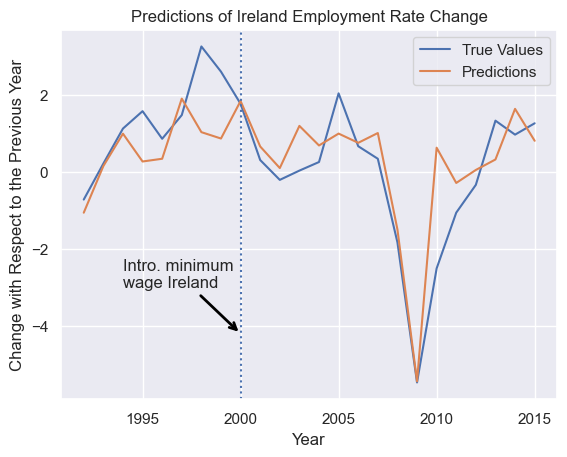

In [25]:
# Visualize the predictions

yhat = result.predict(df_reg[c]) # predictions
df_plot = pd.DataFrame({'year':df_reg.index, 'True Values':df_reg['Ireland'],
                        'Predictions':yhat})

viz_predictions(df_plot, 'year')

### Implementing the covariate

In [26]:
# Re-define the datasets I'll need for the synt. control

y_co = df.drop(columns='Ireland')
y_tr = df['Ireland']

y_pre_co = y_co[y_co.index < 2000]
y_pre_tr = y_tr[y_tr.index < 2000]

# c = the variable specified before: 'uk_gdp'
x_pre_co = gdp.loc[gdp.index < 2000, c]

y_post_co = y_co[y_co.index >= 2000]
y_post_tr = y_tr[y_tr.index >= 2000]
x_post_co = gdp.loc[gdp.index >= 2000, c]

In [27]:
# Given the weight of the covariate,
# this returns the weights of the countries

def find_w_given_vs(vs, x_co_list, y_tr_pre):

    X_times_v = x_co_list[0] * vs[0]

    for year in x_co_list[0].index:
        X_times_v.loc[year, :] += x_co_list[1][year] * vs[1]

    model = SyntheticControl()
    model.fit(X_times_v, y_tr_pre)
    
    return {"loss": model.loss_, "w": model.w_} 

# When passing a weight of 0 for the new covariate,
# the result is the same as before, hence, it's a good sign
find_w_given_vs([1, 0],
                [y_pre_co, x_pre_co],
                y_pre_tr)

{'loss': 8.23878461134172,
 'w': array([2.23718428e-10, 2.72573744e-09, 3.68127803e-10, 1.39565372e-09,
        3.12198182e-10, 3.02950451e-10, 4.80175760e-01, 5.19824235e-01,
        3.80842726e-10])}

In [28]:
# MInimize the loss function to improve the fit

from scipy.optimize import minimize

def v_loss(vs):
    return find_w_given_vs(vs,
                        [y_pre_co, x_pre_co],
                        y_pre_tr).get("loss")

v_solution = minimize(v_loss, [0, 0], method='L-BFGS-B')
v_solution.x
# The optimal weights for the covariates

array([0.99678285, 2.28563701])

In [29]:
w_cov = find_w_given_vs(v_solution.x,
                                 [y_pre_co, x_pre_co],
                                 y_pre_tr)

w_cov
#the optimal weigts for the countries

{'loss': 0.8526125906316382,
 'w': array([1.84970995e-09, 4.77299617e-02, 1.19321297e-10, 2.12959141e-10,
        1.00344972e-10, 4.66058826e-01, 4.86211205e-01, 3.16389535e-09,
        1.94083265e-09])}

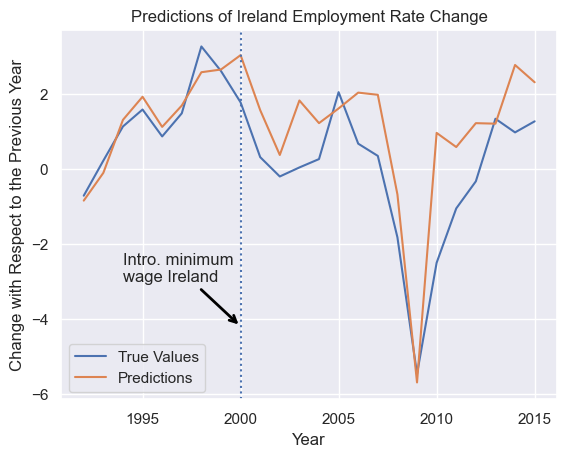

In [30]:
# Make predictions
vs = v_solution.x
x_co_list = [y_co, gdp[c]]

X_times_v = x_co_list[0] * vs[0]

for year in x_co_list[0].index:
    X_times_v.loc[year, :] += x_co_list[1][year] * vs[1]

yhat = X_times_v.dot(w_cov['w'])
df_plot = pd.DataFrame({'year':yhat.index, 'True Values':df['Ireland'],
                        'Predictions':yhat})

# Visualize predictions
viz_predictions(df_plot, 'year')

### Debiased Synthetic Control

This is the final improvement I'll make to the synthetic control. The main reason for this improvement is to being able to compute confidence intervals.

In [31]:
def get_predictions(y_pre_co, x_pre_co, y_pre_tr):

    def v_loss(vs):
        return find_w_given_vs(vs,
                            [y_pre_co, x_pre_co],
                            y_pre_tr).get("loss")

    v_solution = minimize(v_loss, [0, 0], method='L-BFGS-B')
    w_cov = find_w_given_vs(v_solution.x,
                                    [y_pre_co, x_pre_co],
                                    y_pre_tr)

    vs = v_solution.x
    x_co_list = [y_co, gdp[c]]

    y_hat = x_co_list[0] * vs[0]

    for year in x_co_list[0].index:
        y_hat.loc[year, :] += x_co_list[1][year] * vs[1]
    
    return y_hat.dot(w_cov['w'])

In [32]:
# This performs a cross fitting to decrease the bias
# reference: Causal Inference in Python ~ Matheus Facure

def debiased_sc_atts(y_pre_co, y_pre_tr,
                    x_pre_co, x_post_co,
                    y_post_co, y_post_tr, K=3):
                 
    block_size = int(min(np.floor(len(y_pre_tr)/K), len(y_post_tr)))
    blocks = np.split(y_pre_tr.index[-K*block_size:], K)
             
    def fold_effect(hold_out):
        y_hat = get_predictions(y_pre_co.drop(hold_out),
                                x_pre_co.drop(hold_out),
                                y_pre_tr.drop(hold_out))
                 
        bias_hat = np.mean(y_pre_tr.loc[hold_out]
                            - y_hat)
                 
        y0_hat = model.predict(y_post_co)
        return (y_post_tr - y0_hat) - bias_hat
             
    return pd.DataFrame([fold_effect(block) for block in blocks]).T

In [33]:
deb_atts = debiased_sc_atts(y_pre_co,
                            y_pre_tr,
                            x_pre_co,
                            x_post_co,
                            y_post_co,
                            y_post_tr,
                            K=4)

#different predictions for each fold
deb_atts.head()

,Ireland,Ireland,Ireland,Ireland
2000,-1.124474,1.789142,3.307650,0.164231
2001,-1.646175,1.267441,2.785949,-0.357470
2002,-1.487550,1.426065,2.944574,-0.198845
2003,-1.243399,1.670216,3.188725,0.045306
2004,-1.330968,1.582647,3.101156,-0.042263


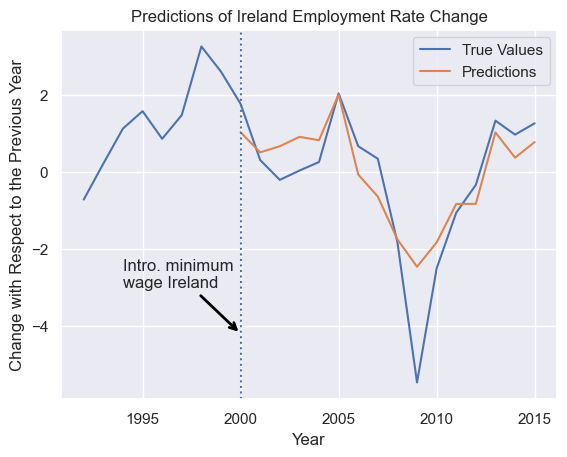

In [34]:
df_plot = pd.merge(deb_atts.mean(axis=1).rename('Predictions'),
            y_tr.rename('True Values'),
            left_index=True, right_index=True, how='outer')

viz_predictions(df_plot, df_plot.index)

### Compute Confidence Intervals

In [35]:
atts_k = deb_atts.mean(axis=0).values
att = np.mean(atts_k)

print("atts_k:", atts_k)
print("ATT:", att)

atts_k: [-2.17324993  0.74036576  2.25887427 -0.88454446]
ATT: -0.014638590718735911


In [36]:
# This is the formula for the standard error
# reference: Causal Inference in Python ~ Matheus Facure

K = len(atts_k)
T0 = len(y_pre_co)
T1 = len(y_post_co)
block_size = min(np.floor(T0/K), T1)

se_hat=np.sqrt(1+((K*block_size)/T1))*np.std(atts_k, ddof=1)/np.sqrt(K)

print("SE:", se_hat)

SE: 1.180848816041685


In [37]:
# Create a dataframe for visualization

df_final_plot =pd.merge(deb_atts.mean(axis=1).rename('Predictions'),
            y_tr.rename('True Values'),
            left_index=True, right_index=True, how='outer')

df_final_plot['Upper Bound'] = df_final_plot['Predictions'] + se_hat
df_final_plot['Lower Bound'] = df_final_plot['Predictions'] - se_hat
df_final_plot = df_final_plot.reset_index(names='Year')
df_final_plot.tail()

,Year,Predictions,True Values,Upper Bound,Lower Bound
19,2011,-0.828991,-1.055,0.351858,-2.009840
20,2012,-0.826299,-0.332,0.354550,-2.007148
21,2013,1.030093,1.336,2.210942,-0.150755
22,2014,0.374442,0.973,1.555290,-0.806407
23,2015,0.778842,1.268,1.959691,-0.402006


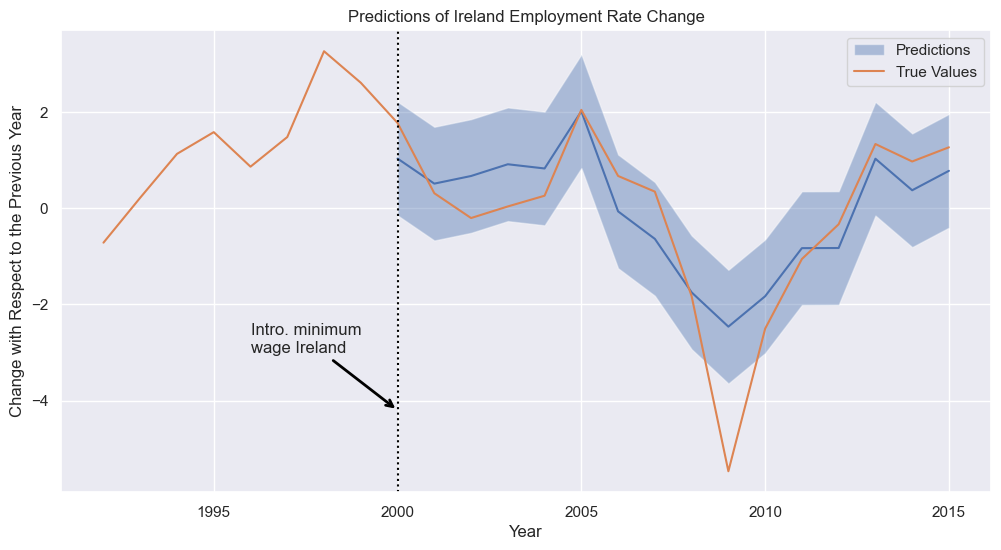

In [38]:
fig, ax = plt.subplots(figsize=(12,6))

ax.fill_between(df_final_plot['Year'], df_final_plot['Lower Bound'],
                df_final_plot['Upper Bound'], alpha=0.4,
                label='Predictions')

sns.lineplot(data=df_final_plot, x=df_final_plot['Year'],
             y=df_final_plot['Predictions'], ax=ax)

sns.lineplot(data=df_final_plot, x=df_final_plot['Year'],
             y=df_final_plot['True Values'], label='True Values', ax=ax)

plt.axvline(x=2000, linestyle=':', color='black')

ax.set_title('Predictions of Ireland Employment Rate Change')
ax.set_xlabel('Year')
ax.set_ylabel('Change with Respect to the Previous Year')

ax.annotate('Intro. minimum\nwage Ireland',
                xy=(2000, -4.2), xytext=(1996, -3), xycoords='data',
                arrowprops=dict(arrowstyle="->", linewidth=2,
                color='black'))

plt.show()

### Export for Tableau

In [58]:
df2 = (df2.drop(columns='code')
    .T)
df2 = df2.rename(columns=df2.iloc[0]).drop('name')
df2.reset_index(names='Year', inplace=True)
df2.head()

,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland,Ireland
1991,56.259,53.93,61.657,59.302,64.201,45.57,72.798,58.608,63.68,47.615
1992,55.009,54.558,61.96,54.893,61.245,44.134,72.035,58.297,63.225,46.9
1993,53.832,54.281,60.148,51.363,57.596,43.261,70.62,58.101,62.75,47.12
1994,53.083,56.969,59.204,50.575,56.709,42.392,70.624,58.877,61.825,48.251
1995,53.001,56.845,60.094,49.563,57.54,41.758,72.983,59.009,62.187,49.834


In [74]:
df_tot = pd.merge(df2, df_final_plot.drop(columns='True Values'),
         on='Year')

for year in range(2000,2016):
    prev = df_tot.loc[df_tot['Year']==year-1, 'Ireland'].values[0]
    df_tot.loc[df_tot['Year']==year, 'Predictions'] += prev
    df_tot.loc[df_tot['Year']==year, 'Upper Bound'] += prev
    df_tot.loc[df_tot['Year']==year, 'Lower Bound'] += prev

df_tot.tail()

In [77]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\total_variation_empl_rate.csv'
df_tot.to_csv(path)

In [87]:
df_yearly_change = pd.merge(df.reset_index(names='Year'), df_final_plot.drop(columns='True Values'),
         on='Year')
df_yearly_change.head()

,Year,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland,Ireland,Predictions,Upper Bound,Lower Bound
0,1992,-1.25,0.628,0.303,-4.409,-2.956,-1.436,-0.763,-0.311,-0.455,-0.715,NaN,NaN,NaN
1,1993,-1.177,-0.277,-1.812,-3.53,-3.649,-0.873,-1.415,-0.196,-0.475,0.22,NaN,NaN,NaN
2,1994,-0.749,2.688,-0.944,-0.788,-0.887,-0.869,0.004,0.776,-0.925,1.131,NaN,NaN,NaN
3,1995,-0.082,-0.124,0.89,-1.012,0.831,-0.634,2.359,0.132,0.362,1.583,NaN,NaN,NaN
4,1996,-0.472,-1.121,0.646,0.446,-0.583,0.038,0.051,2.116,2.829,0.865,NaN,NaN,NaN


In [88]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\yearly_variation_empl_rate.csv'
df_yearly_change.to_csv(path)

In [94]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\raw_employment_rate_2022.xlsx'
df3 = pd.read_excel(path).drop(columns=['Country Code']).T
df3.rename(columns=df3.iloc[0, :], inplace=True)
df3.drop('Country Name', inplace=True)

path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\cleaned_employment_rate_2022.xlsx'
df3.to_csv(path)

## Conclusions

Wow, what a journey it's been! But you know what? The findings are pretty intriguing.

With the data available, **there's no statistical evidence suggesting that the introduction of a minimum wage in Ireland led to a decrease in the employment rate.**

But let's not jump to conclusions too quickly. We need to remember that there's not a ton of data available, especially considering that some countries still don't have a minimum wage in place.

To imrpove further, it'd be cool to see how the gdp of a country changes with the introduction of a minimum wage. And also, how the satisfaction of workers changes.

Who knows... this may be something I may do in the future.